# Importing Libraries and Dataset

In [26]:
!pip3 install klib
!pip3 install lazypredict
!pip3 install category_encoders
!pip3 install catboost

import gdown

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib as kl
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [27]:
datasets = ['1kCemcxt-XwUHY-I2XlZ9E62b34irRnhc', '13CJ4LtrE6Iwmv-89rKi_sTFZqeyAlaKz']

for link in datasets:
  gdown.download(f'https://drive.google.com/uc?id={link}', quiet=True)

In [28]:
df = pd.read_csv('/content/Train_data.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


# Pre Processing

In [29]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [31]:
df.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
count,25192.00,25192,25192,25192,25192.00,25192.00,25192.00,25192.00,25192.00,25192.00,...,25192.00,25192.00,25192.00,25192.00,25192.00,25192.00,25192.00,25192.00,25192.00,25192
unique,NaN,3,66,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,20526,8003,14973,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13449
mean,305.05,NaN,NaN,NaN,24330.63,3491.85,0.00,0.02,0.00,0.20,...,115.06,0.52,0.08,0.15,0.03,0.29,0.28,0.12,0.12,NaN
std,2686.56,NaN,NaN,NaN,2410805.40,88830.72,0.01,0.26,0.01,2.15,...,110.65,0.45,0.19,0.31,0.11,0.45,0.45,0.31,0.32,NaN
min,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,...,10.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
50%,0.00,NaN,NaN,NaN,44.00,0.00,0.00,0.00,0.00,0.00,...,61.00,0.51,0.03,0.00,0.00,0.00,0.00,0.00,0.00,NaN
75%,0.00,NaN,NaN,NaN,279.00,530.25,0.00,0.00,0.00,0.00,...,255.00,1.00,0.07,0.06,0.02,1.00,1.00,0.00,0.00,NaN


In [32]:
df['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [33]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Removing Duplicate

In [34]:
print(df.shape)

df.drop_duplicates(subset=df.columns[1:],inplace=True)

print(df.shape)

(25192, 42)
(24995, 42)


### Encoding

In [35]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['protocol_type', 'service', 'flag', 'class']
Numerical Variables:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [36]:
label_encoder = LabelEncoder()
columns_to_encode = ['protocol_type', 'service', 'flag', 'class']
df[columns_to_encode] = df[columns_to_encode].apply(label_encoder.fit_transform)

### Spilliting

In [37]:
y = df['class']  # Target variable
X = df.drop(columns=['class'])  # Features

### Correlation
        

Text(0.5, 1.0, 'Correlation Heatmap of Features')

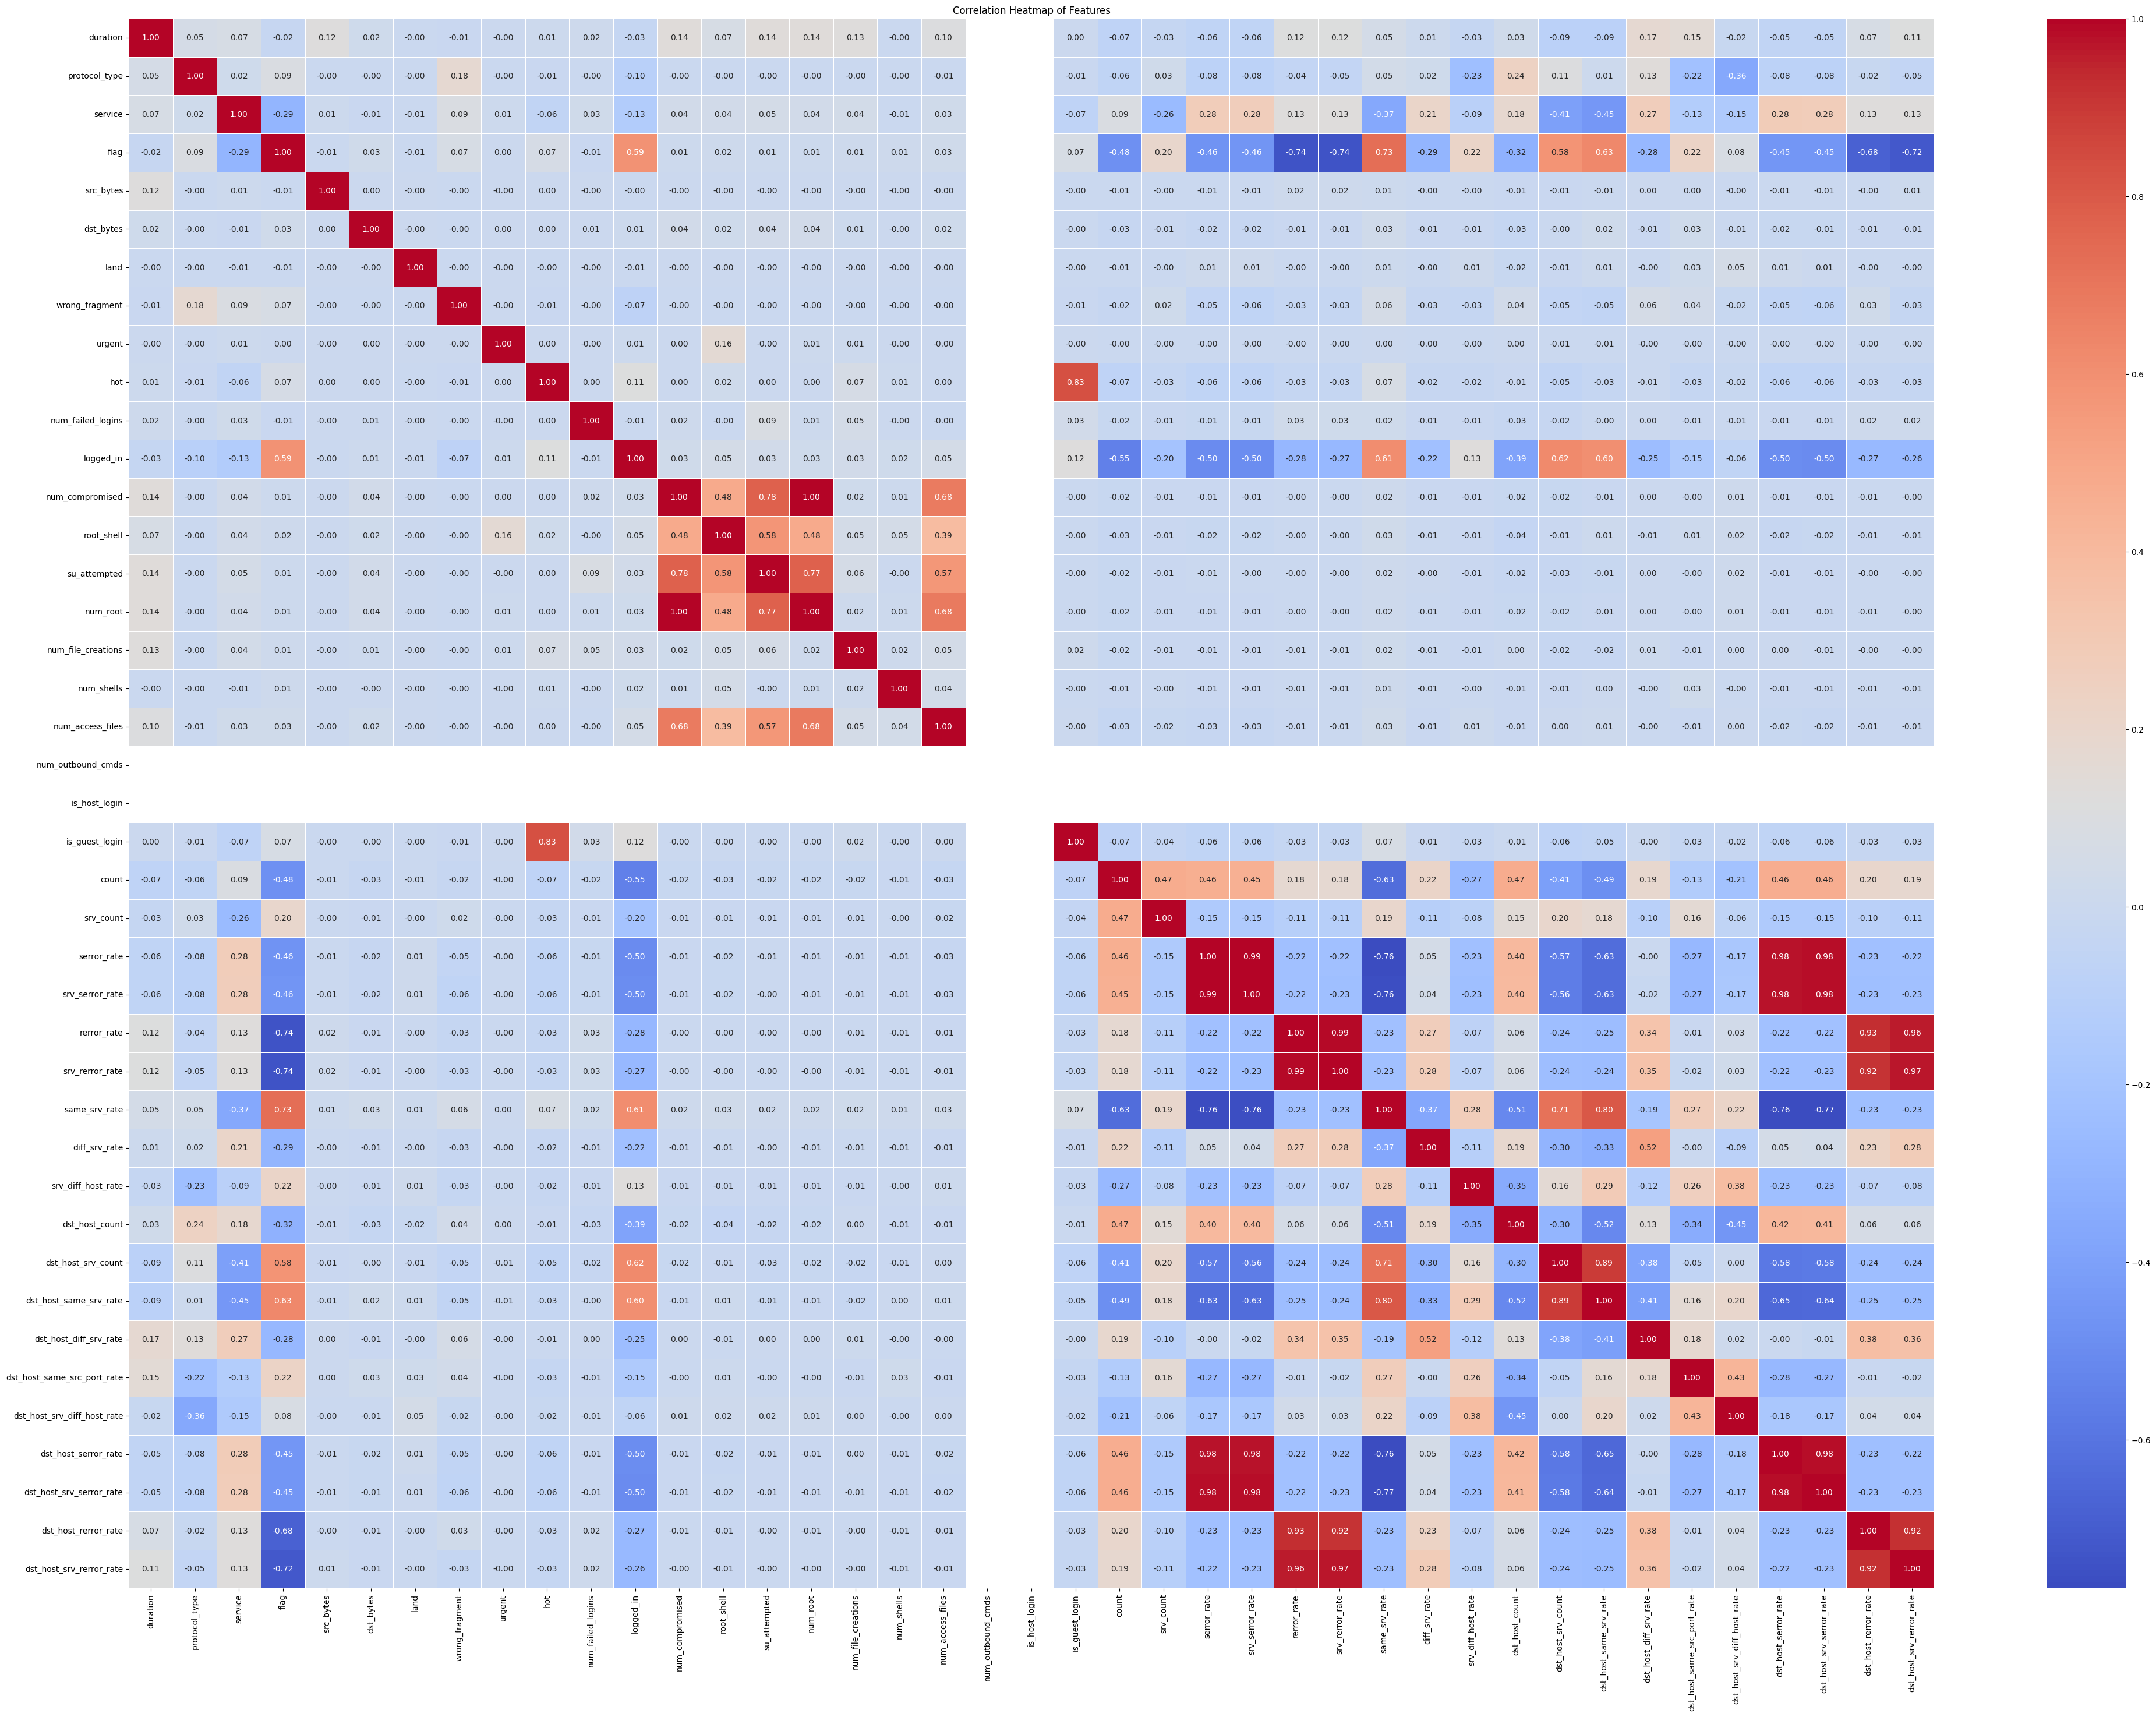

In [38]:
correlation_matrix = X.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(50, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
# plt.show()

Dropping all the variables which has more than 70% correlation

In [39]:
corr_matrix = X.corr()
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)
X.drop(columns=high_corr_features, inplace=True)
X.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,is_host_login,count,srv_count,serror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,1,19,9,491,0,0,0,0,0,...,0,2,2,0.00,0.00,0.00,150,0.03,0.17,0.00
1,0,2,41,9,146,0,0,0,0,0,...,0,13,1,0.00,0.15,0.00,255,0.60,0.88,0.00
2,0,1,46,5,0,0,0,0,0,0,...,0,123,6,1.00,0.07,0.00,255,0.05,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,0,5,5,0.20,0.00,0.00,30,0.00,0.03,0.04
4,0,1,22,9,199,420,0,0,0,0,...,0,30,32,0.00,0.00,0.09,255,0.00,0.00,0.00


### Impotant Features

As this is a large dataset, we are taking only the impotant features

In [40]:
model = CatBoostClassifier()
model.fit(X,y)

feature_importance = model.get_feature_importance()
feature_names = X.columns
for score, name in sorted(zip(feature_importance, feature_names), reverse=True):
    print('{}: {}'.format(name, score))


Learning rate set to 0.040721
0:	learn: 0.5915691	total: 20.9ms	remaining: 20.9s
1:	learn: 0.5169157	total: 31.5ms	remaining: 15.7s
2:	learn: 0.4462739	total: 41ms	remaining: 13.6s
3:	learn: 0.3819256	total: 50.4ms	remaining: 12.6s
4:	learn: 0.3393016	total: 61.7ms	remaining: 12.3s
5:	learn: 0.2897712	total: 71.8ms	remaining: 11.9s
6:	learn: 0.2450856	total: 81.7ms	remaining: 11.6s
7:	learn: 0.2209180	total: 91.6ms	remaining: 11.4s
8:	learn: 0.1987343	total: 106ms	remaining: 11.7s
9:	learn: 0.1780984	total: 118ms	remaining: 11.6s
10:	learn: 0.1627871	total: 130ms	remaining: 11.7s
11:	learn: 0.1455564	total: 141ms	remaining: 11.6s
12:	learn: 0.1336216	total: 150ms	remaining: 11.4s
13:	learn: 0.1208965	total: 161ms	remaining: 11.3s
14:	learn: 0.1097340	total: 172ms	remaining: 11.3s
15:	learn: 0.1018899	total: 181ms	remaining: 11.2s
16:	learn: 0.0957928	total: 207ms	remaining: 11.9s
17:	learn: 0.0890154	total: 237ms	remaining: 13s
18:	learn: 0.0829562	total: 265ms	remaining: 13.7s
19:	lea

['src_bytes', 'dst_bytes', 'flag', 'logged_in', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'count', 'serror_rate', 'service', 'protocol_type', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'dst_host_count', 'srv_count']


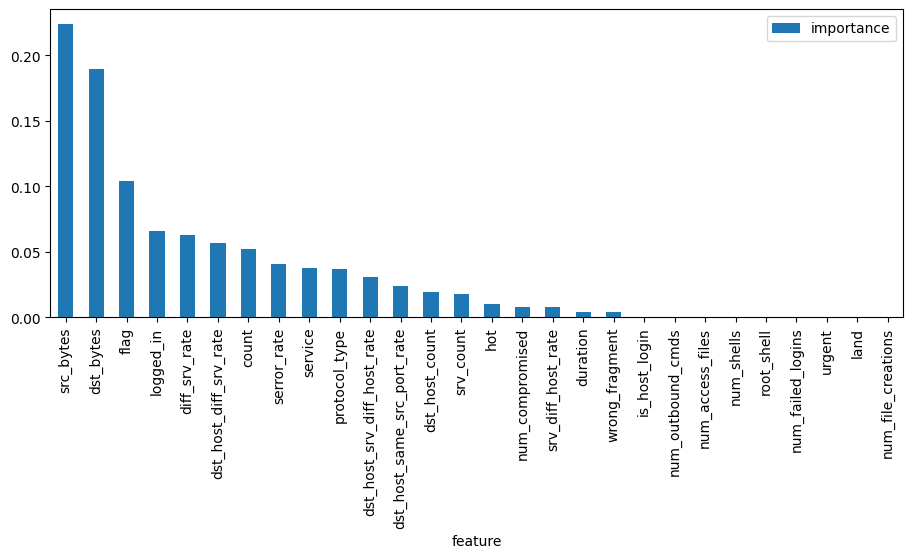

In [41]:
# using random forest to find the most important features

rfc = RandomForestClassifier();
rfc.fit(X, y);

score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();
Imp_list = importances[importances['importance'] > 0.01].index.tolist()
print(Imp_list)

### Resampling Dataset

In [42]:
X = X[['src_bytes', 'dst_bytes', 'flag', 'diff_srv_rate', 'count', 'logged_in', 'dst_host_diff_srv_rate', 'serror_rate', 'service', 'protocol_type', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'srv_count', 'dst_host_count', 'hot']]
y = y.values.reshape(-1, 1)

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

print(X_smote.shape)
print(y_smote.shape)


(26840, 15)
(26840,)


#Training and Testing

## Spliting

In [43]:
# Splitting the data into train and test
X = X_smote
y = y_smote

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Scaling

In [44]:
# Scaling the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Model Building : our function to evaluate the model using cross validation and other metrics
def model_eval(model,X,y):

    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

    print(f"ROC AUC: {scores.mean():.4f} (+/- {scores.std():.4f})")

    model.fit(X, y)
    pred = model.predict(X_test)


    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))
    print(accuracy_score(y_test, pred))
    print(roc_auc_score(y_test, pred))


    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

### Using lazyclassifier to predict which model will perform better faster

 97%|█████████▋| 28/29 [01:36<00:01,  1.57s/it]

[LightGBM] [Info] Number of positive: 9373, number of negative: 9415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 18788, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498882 -> initscore=-0.004471
[LightGBM] [Info] Start training from score -0.004471


100%|██████████| 29/29 [01:36<00:00,  3.34s/it]


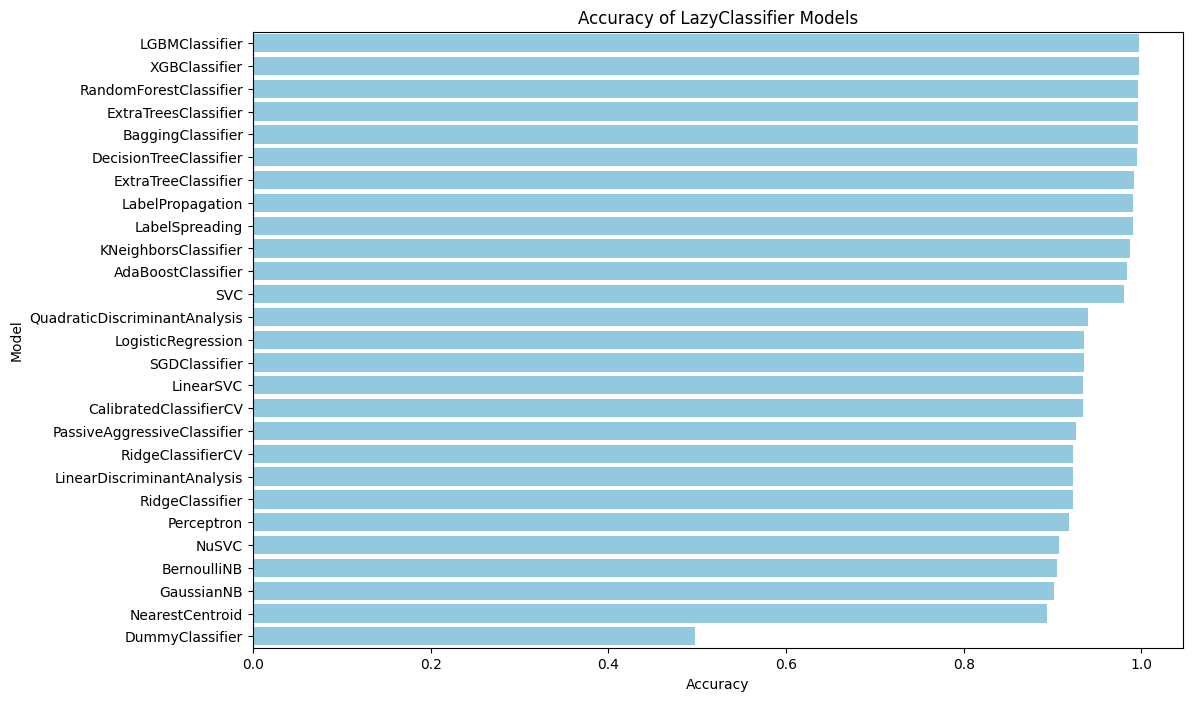

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,1.00,1.00,0.44
XGBClassifier,1.00,1.00,1.00,1.00,0.68
RandomForestClassifier,1.00,1.00,1.00,1.00,1.30
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.22
BaggingClassifier,1.00,1.00,1.00,1.00,0.43
DecisionTreeClassifier,0.99,0.99,0.99,0.99,0.12
ExtraTreeClassifier,0.99,0.99,0.99,0.99,0.05
LabelPropagation,0.99,0.99,0.99,0.99,19.88
LabelSpreading,0.99,0.99,0.99,0.99,30.34


In [48]:
clf = LazyClassifier(verbose=0, predictions=True)

# Fit the models and make predictions
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y=models.index, data=models, color='skyblue')
plt.title('Accuracy of LazyClassifier Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()
models

# Saving The Model Best Model

In [47]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

joblib.dump(clf, 'random_forest_model.sav')

loaded_model = joblib.load('random_forest_model.sav')

y_pred = loaded_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9973919523099851
